<h1>Correlating COVID Vaccinations with COVID Cases and Deaths</h1>
    <h5> Team Discord Kittens: Gage Johnson, Derek Metzman, Kevin Yeager</h5>

<h2>Introduction:</h2> 

The COVID-19 virus has had a drastic effect on all of our lives. With the Omicron variant still having a large impact on the entire world, we wanted to take a closer look at the number of COVID vaccinations, cases, and deaths, specifically in Maryland. We decided we should look at specifically COVID data in Maryland, and even closer by looking at it per county, so we do not have any extraneous variables such as access to vaccines or lack of testing. Even though these may have been factors, this is the most we can limit the data while still having a diverse set of data. We also decided that it would be best to look at these three datasets because of how they all interact with each other. There are so many datasets that were about COVID, that is why we chose this topic to do our tutorial on.

In this tutorial, our goal is to tidy up all the COVID data that we have found, provide insight into the effectiveness of the vaccine, and predict what the future of the COVID-19 virus might entail. We hope that our data will help provide concrete visuals to help viewers better understand Maryland's trajectory for the future.

<h2>Getting Started with Data:</h2>

We make use of Python3 with a few imported libraries: [pandas](https://pandas.pydata.org/) , [matplot](https://matplotlib.org/)

<h2>Reading the Data:</h2>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
#Data Scraping for Total COVID Cases
dfC = pd.read_csv("Cases.csv",parse_dates=['DATE'])

#Drop useless columns
dfC = dfC.drop(columns=['OBJECTID', 'Unknown'])

dfC

,DATE,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
0,2020-03-15 10:00:00,NaN,2,3,1,NaN,NaN,1,NaN,1,...,NaN,12,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-16 10:00:00,NaN,1,4,1,NaN,NaN,1,NaN,1,...,NaN,10,15,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,2020-03-17 10:00:00,NaN,3,6,1,NaN,NaN,1,NaN,1,...,NaN,24,14,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,2020-03-18 10:00:00,NaN,4,10,4,NaN,NaN,1,NaN,2,...,NaN,31,20,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2020-03-19 10:00:00,NaN,5,12,8,1.0,NaN,2,NaN,2,...,NaN,33,23,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2022-05-09 10:00:00,17245.0,92118,135283,115565,11375.0,6127.0,21985,15799.0,28730,...,3098.0,175968,174430,7216.0,5239.0,19213.0,5679.0,35361.0,19899.0,8769.0
786,2022-05-10 10:00:00,17263.0,92299,135442,115748,11389.0,6130.0,22010,15822.0,28766,...,3102.0,176399,174636,7219.0,5245.0,19233.0,5684.0,35369.0,19918.0,8786.0
787,2022-05-11 10:00:00,17270.0,92423,135643,116019,11416.0,6131.0,22040,15850.0,28805,...,3109.0,176767,174792,7221.0,5249.0,19266.0,5686.0,35387.0,19935.0,8796.0
788,2022-05-12 10:00:00,17275.0,92620,135941,116287,11437.0,6145.0,22084,15870.0,28857,...,3114.0,177331,175069,7234.0,5253.0,19311.0,5693.0,35417.0,19967.0,8812.0


In [83]:
#Data Scraping for Total COVID Deaths
dfD = pd.read_csv("Deaths.csv",parse_dates=['DATE'])

#Drop useless columns
dfD = dfD.drop(columns=['OBJECTID', 'Unknown'])

dfD

,DATE,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
0,2020-04-03 10:00:00,0.0,4.0,3.0,4.0,1.0,0.0,5.0,1.0,1.0,...,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020-04-04 10:00:00,0.0,6.0,4.0,6.0,1.0,0.0,6.0,1.0,1.0,...,0.0,9.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2020-04-05 10:00:00,0.0,6.0,6.0,7.0,1.0,0.0,8.0,1.0,2.0,...,0.0,13.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020-04-06 10:00:00,0.0,8.0,11.0,8.0,1.0,0.0,10.0,1.0,2.0,...,0.0,19.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2020-04-07 10:00:00,0.0,8.0,11.0,9.0,1.0,0.0,16.0,1.0,2.0,...,0.0,21.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2022-05-09 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,2022-05-10 10:00:00,360.0,1061.0,2435.0,1742.0,143.0,78.0,397.0,256.0,350.0,...,63.0,1986.0,2112.0,108.0,73.0,215.0,87.0,580.0,327.0,159.0
768,2022-05-11 10:00:00,360.0,1061.0,2437.0,1742.0,143.0,78.0,400.0,256.0,350.0,...,63.0,1988.0,2112.0,108.0,73.0,216.0,87.0,580.0,327.0,159.0
769,2022-05-12 10:00:00,360.0,1061.0,2439.0,1742.0,143.0,78.0,401.0,256.0,350.0,...,63.0,1989.0,2114.0,108.0,73.0,216.0,87.0,580.0,327.0,159.0


In [109]:
#Data Scraping for Total COVID Vaccinations
dfV = pd.read_csv("Vacc.csv",parse_dates=['VACCINATION_DATE'])

#Drop useless columns
dfV.drop(columns = ["FirstDoseDaily", "SecondDoseDaily", "SingleDoseDaily", "AtLeastOneDose", "FullyVaccinated"], inplace=True)

dfV = dfV[dfV["County"].notna()]
dfV = dfV[dfV['County'] != "OOS"]
dfV = dfV.reset_index()

dfV

,index,VACCINATION_DATE,County,FirstDoseCumulative,SecondDoseCumulative,SingleDoseCumulative,AtLeastOneDoseCumulative,FullyVaccinatedCumulative
0,0,2020-12-14 10:00:00,Anne Arundel,2,0,0,2,0
1,1,2020-12-14 10:00:00,Baltimore,1,0,0,1,0
2,2,2020-12-14 10:00:00,Carroll,1,0,0,1,0
3,3,2020-12-14 10:00:00,Frederick,1,1,0,1,1
4,4,2020-12-14 10:00:00,Howard,3,0,0,3,0
...,...,...,...,...,...,...,...,...
12075,12895,2022-05-04 11:00:00,St. Marys,70484,64544,4548,75032,69092
12076,12896,2022-05-04 11:00:00,Talbot,25655,23445,3146,28801,26591
12077,12897,2022-05-04 11:00:00,Washington,79932,73169,12422,92354,85591
12078,12898,2022-05-04 11:00:00,Wicomico,56284,51491,4925,61209,56416


In [90]:
#Data Scraping and Cleaning in order to get Daily Cases from our Dataset
dfDC = pd.DataFrame()
dfDC["DATE"] = dfC["DATE"]
currentTotal = 0
for county in counties:
    data = []
    for index, row in dfC.iterrows():
        if index == 0:
            currentTotal = dfC[county][index]
            data.append(currentTotal)
        else:
            if dfC[county][index] - currentTotal < 0:
                data.append(0)
            else:
                data.append(dfC[county][index] - currentTotal)
                currentTotal = dfC[county][index]

    dfDC[county] = data  
dfDC

,DATE,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
0,2020-03-15 10:00:00,NaN,2,3,1,NaN,NaN,1,NaN,1,...,NaN,12,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-16 10:00:00,NaN,0,1,0,NaN,NaN,0,NaN,0,...,NaN,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-17 10:00:00,NaN,1,2,0,NaN,NaN,0,NaN,0,...,NaN,12,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-03-18 10:00:00,NaN,1,4,3,NaN,NaN,0,NaN,1,...,NaN,7,5,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-03-19 10:00:00,NaN,1,2,4,NaN,NaN,1,NaN,0,...,NaN,2,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2022-05-09 10:00:00,1.0,116,192,161,8.0,0.0,36,16.0,34,...,3.0,324,149,5.0,0.0,14.0,4.0,8.0,8.0,2.0
786,2022-05-10 10:00:00,18.0,181,159,183,14.0,3.0,25,23.0,36,...,4.0,431,206,3.0,6.0,20.0,5.0,8.0,19.0,17.0
787,2022-05-11 10:00:00,7.0,124,201,271,27.0,1.0,30,28.0,39,...,7.0,368,156,2.0,4.0,33.0,2.0,18.0,17.0,10.0
788,2022-05-12 10:00:00,5.0,197,298,268,21.0,14.0,44,20.0,52,...,5.0,564,277,13.0,4.0,45.0,7.0,30.0,32.0,16.0


In [91]:
#Data Scraping and Cleaning in order to obtain Number of COVID Deaths Daily 
dfDD = pd.DataFrame()
dfDD["DATE"] = dfD["DATE"]
currentTotal = 0
for county in counties:
    data = []
    for index, row in dfD.iterrows():
        if index == 0:
            currentTotal = dfD[county][index]
            data.append(currentTotal)
        else:
            if dfD[county][index] - currentTotal < 0:
                data.append(0)
            else:
                data.append(dfD[county][index] - currentTotal)
                currentTotal = dfD[county][index]

    dfDD[county] = data  
dfDD


,DATE,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
0,2020-04-03 10:00:00,0.0,4.0,3.0,4.0,1.0,0.0,5.0,1.0,1.0,...,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020-04-04 10:00:00,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-04-05 10:00:00,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-06 10:00:00,0.0,2.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-07 10:00:00,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,...,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2022-05-09 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,2022-05-10 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,2022-05-11 10:00:00,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
769,2022-05-12 10:00:00,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Data Scraping and Cleaning:</h2>

Vaccine Dataset: For this dataset, there were many columns that we did not need to look at. For example, we found that looking at the daily vaccinations was not necessary and we were able to remove it. Even though we found that looking at the total number of people vaccinated was an important statistic, we also wanted to look at the data taking population into account. 


Deaths Dataset: This data set shows the increasing of the total number of deaths to COVID per day. The issue with this is that it doesn't show how many died so we had to tweak the data to show the deaths each day for each county There was also an unknown  column  that was removed. An array with the counties names so it could be easily plotted by looping through the array. In order to to get daily deaths for each county we had to loop through each county and its rows and creating a new dataset dfDD in which it would subtract the total deaths at that day for the county and subtract it by its previous day in order to get the death, this way we could get the amount of deaths each day for each county.


Cases Dataset: This data set shows the increasing of total COVID cases per day. The issue is that this dataset does not show the cases daily so we had to tweak the data to show daily cases per county. We also removed the ObjectID column and the Unknown column because they are useless.

<h2> Graphing Total COVID Cases and Deaths: </h2>

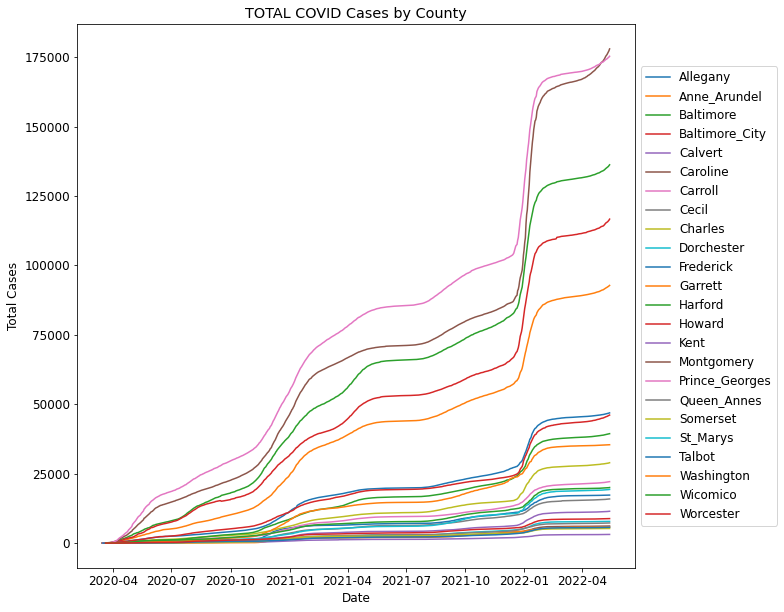

In [94]:
#Graph for Total COVID Cases

counties = dfC.loc[:, dfC.columns != 'DATE']
plt.figure(figsize=(10, 10))
plt.title("TOTAL COVID Cases by County")
plt.ylabel("Total Cases")
plt.xlabel("Date")
plt.rcParams['font.size'] = '12'
for county in counties:
    plt.plot(dfC['DATE'], dfC[county])
plt.legend(counties,loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show();

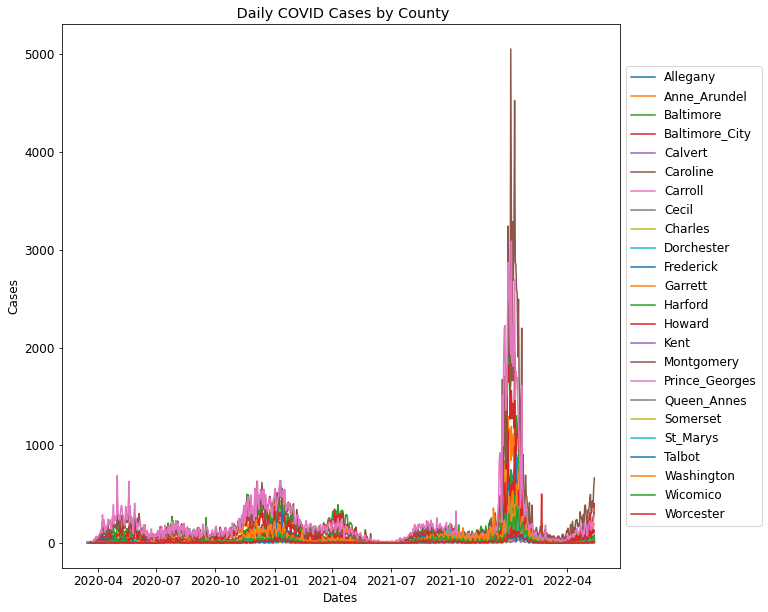

In [118]:
#Graph for Daily COVID Cases

plt.figure(figsize = (10,10))
plt.title(" Daily COVID Cases by County")
plt.ylabel("Cases")
plt.xlabel("Dates")
plt.rcParams['font.size'] = '12'
for county in counties:
    plt.plot(dfDC['DATE'], dfDC[county])
plt.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

As we can see by the Data Provided there was a huge spike in COVID cases around December 2021 - January 2022. This was caused by the Omicron Variant of the virus that was even more easily transmissible but less deadly. 

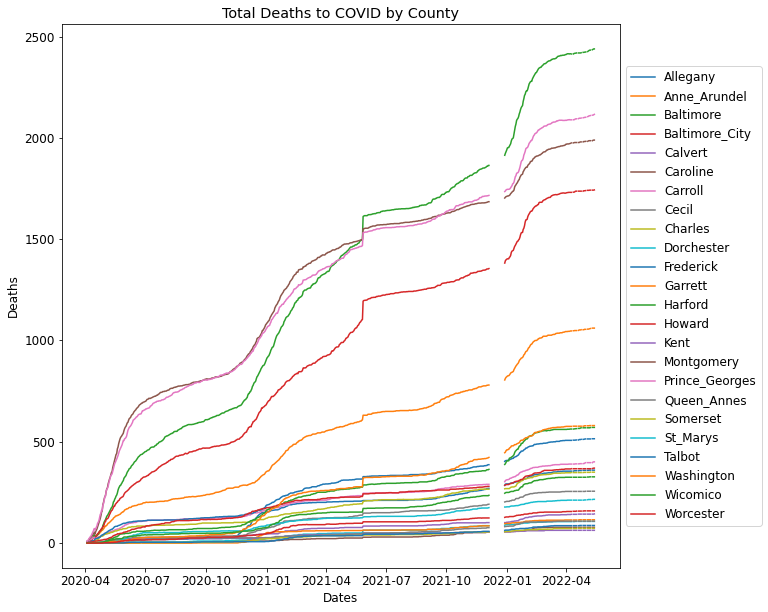

In [119]:
#Graph for Total COVID Deaths

plt.figure(figsize = (10,10))
plt.title("Total Deaths to COVID by County")
plt.ylabel("Deaths")
plt.xlabel("Dates")
plt.rcParams['font.size'] = '12'
for county in counties:
    plt.plot(dfD['DATE'], dfD[county])
plt.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

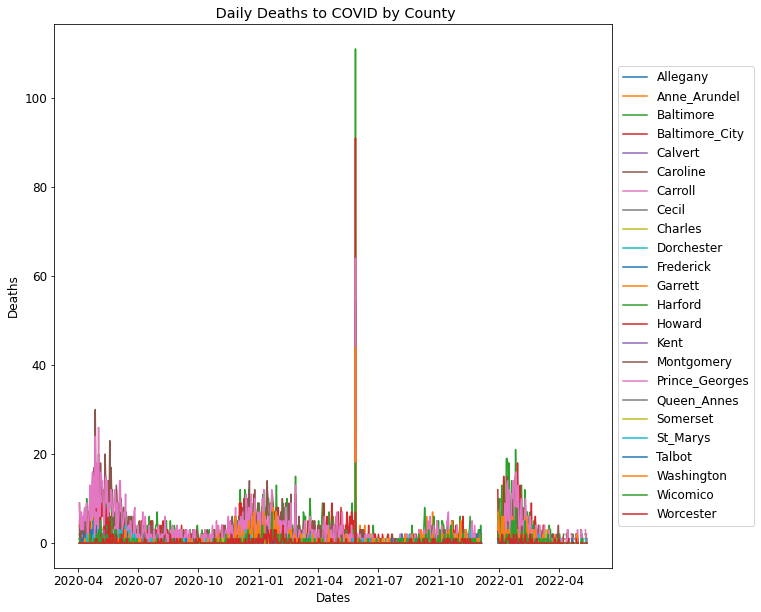

In [120]:
#Graph for Daily COVID Deaths
plt.figure(figsize = (10,10))
plt.title(" Daily Deaths to COVID by County")
plt.ylabel("Deaths")
plt.xlabel("Dates")
plt.rcParams['font.size'] = '12'
for county in counties:
    plt.plot(dfDD['DATE'], dfDD[county])
plt.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<h2> Graphing The Total Number of People Vaccinated either Once, Twice, or Fully: </h2>

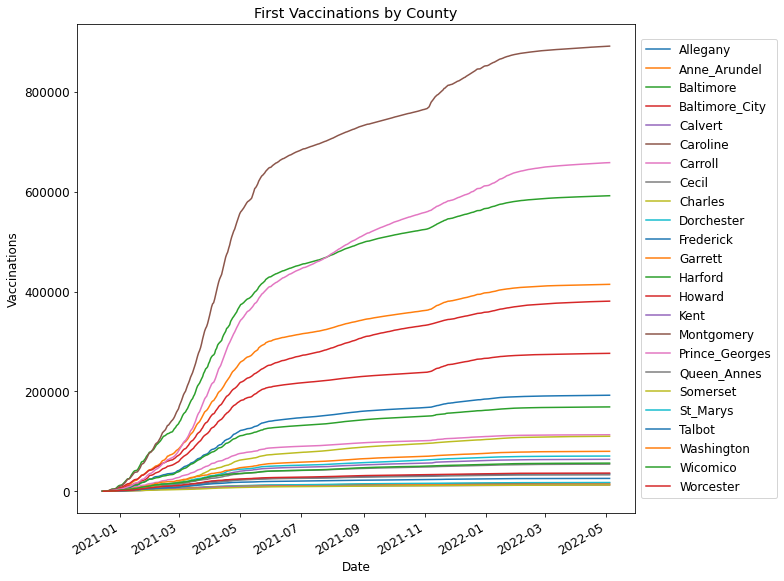

In [102]:
#Graph for people with First Vaccinine

fig, ax = plt.subplots()
plt.title("First Vaccinations by County")
plt.ylabel("Vaccinations")
plt.xlabel("Date")
dfV.groupby("County").plot(x = "VACCINATION_DATE", y = "FirstDoseCumulative", ax=ax, xlabel = "Date", figsize = (10, 10))
ax.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

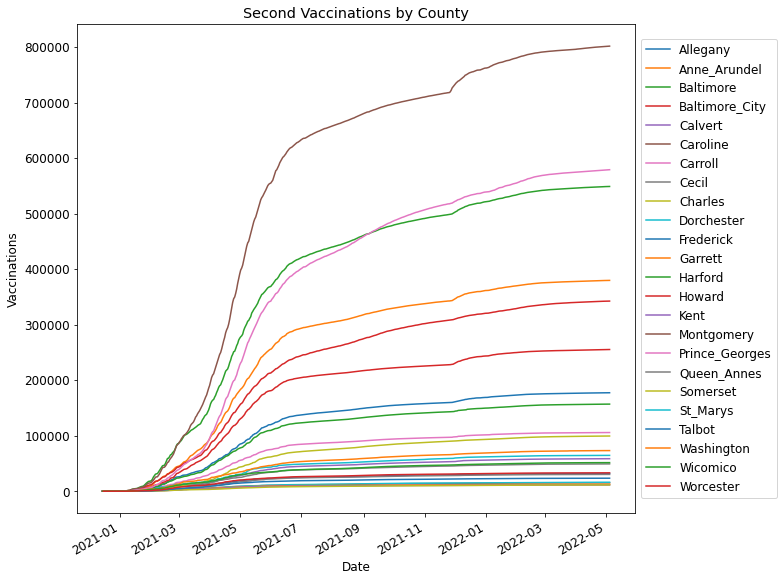

In [103]:
#Graph for Total people with Second Vaccine
fig, ax = plt.subplots()
plt.title("Second Vaccinations by County")
plt.ylabel("Vaccinations")
plt.xlabel("Date")
dfV.groupby("County").plot(x = "VACCINATION_DATE", y = "SecondDoseCumulative", ax=ax, xlabel = "Date", figsize = (10, 10))
ax.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

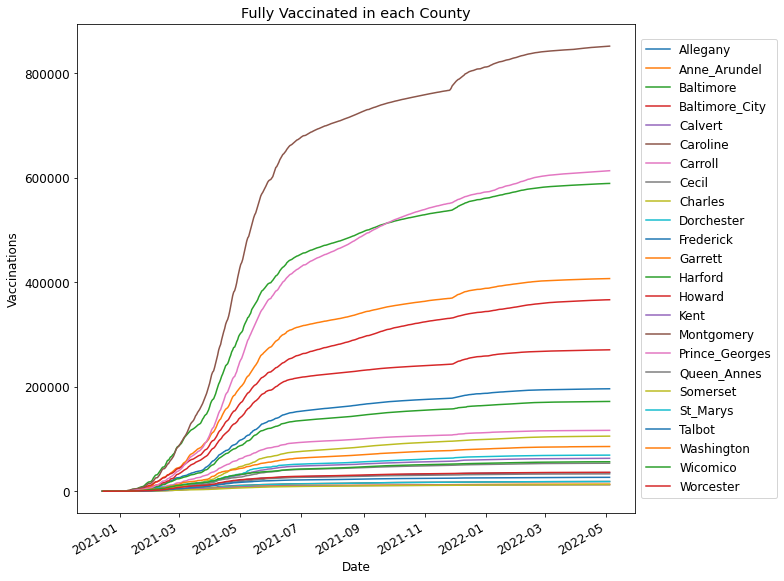

In [121]:
#Graph for Total people who are Fully Vaccinated
fig, ax = plt.subplots()
plt.title("Fully Vaccinated in each County")
plt.ylabel("Vaccinations")
plt.xlabel("Date")
dfV.groupby("County").plot(x = "VACCINATION_DATE", y = "FullyVaccinatedCumulative", ax=ax, xlabel = "Date", figsize = (10, 10))
ax.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<h2> Graphing the Percentage of People who have been Vaccinated: </h2>

In [111]:
#Dictionary for populations per county
populations = {
    "Montgomery" : 1057320,
    "Prince Georges" : 908451,
    "Baltimore" : 825903,
    "Anne Arundel" : 590367,
    "Baltimore City" : 566631,
    "Howard" : 334897,
    "Frederick" : 273359,
    "Harford" : 260118,
    "Carroll" : 168987,
    "Charles" : 168600,
    "Washington" : 152228,
    "St. Marys" : 115880,
    "Wicomico" : 105304,
    "Cecil" : 103488,
    "Calvert" : 93905,
    "Allegany" : 68841,
    "Worcester" : 53224,
    "Queen Annes" : 51080,
    "Talbot" : 37502,
    "Caroline": 33706,
    "Dorchester" : 31836,
    "Garrett" : 28657,
    "Somerset": 25646,
    "Kent" : 19386,
}
#Created a New Data Frame to track percentage of Vaccinated people per their county population.
dfVP = pd.DataFrame()
data = []
data2 = []
data3 = []

for index, row in dfV.iterrows():
    data.append(dfV["FirstDoseCumulative"][index] / populations[dfV["County"][index]])
    data2.append(dfV["SecondDoseCumulative"][index] / populations[dfV["County"][index]])
    data3.append(dfV["FullyVaccinatedCumulative"][index] / populations[dfV["County"][index]])
                
    
dfVP["FDP"] = data
dfVP["SDP"] = data2
dfVP["FVP"] = data3
dfVP["VD"]= dfV["VACCINATION_DATE"]
dfVP["County"]= dfV["County"]

<h3> Understanding the Data: </h3>
Here, we are representing the amount of people vaccinated with relation to the population. This is important to do because counties with a much larger population were overshadowing others and it was hiding some of the data. For example, while looking at the total number of people fully vaccinated, it looks like Prince George’s county is the closest to Montgomery county. However, when we look at the graph taking the population into account, Howard County is actually higher than Montgomery county, and Prince George’s county is actually noticeably lower than both.


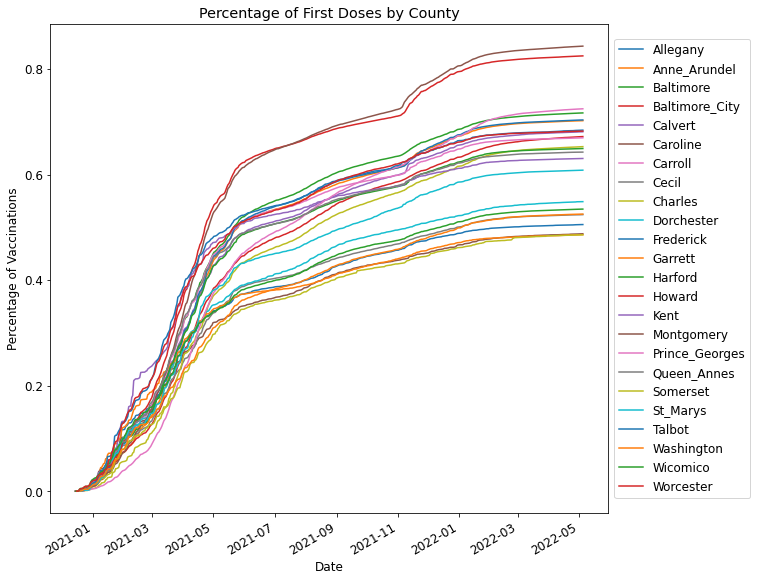

In [117]:
fig, ax = plt.subplots()
plt.title("Percentage of First Doses by County")
plt.ylabel("Percentage of Vaccinations")
plt.xlabel("Date")
dfVP.groupby("County").plot(x = "VD", y = "FDP", ax=ax, xlabel = "Date", figsize = (10, 10))
ax.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

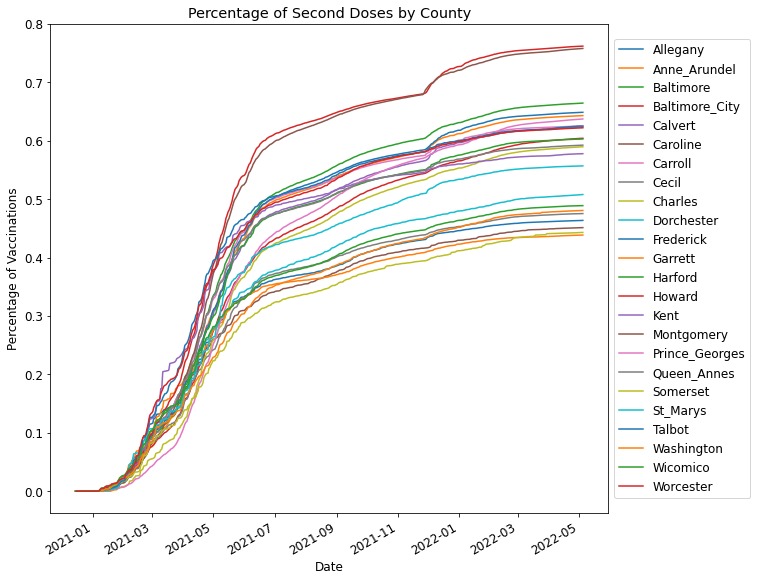

In [115]:
#Graph for Percentage of people who are Fully Vaccinated
fig, ax = plt.subplots()
plt.title("Percentage of Second Doses by County")
plt.ylabel("Percentage of Vaccinations")
plt.xlabel("Date")
dfVP.groupby("County").plot(x = "VD", y = "SDP", ax=ax, xlabel = "Date", figsize = (10, 10))
ax.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

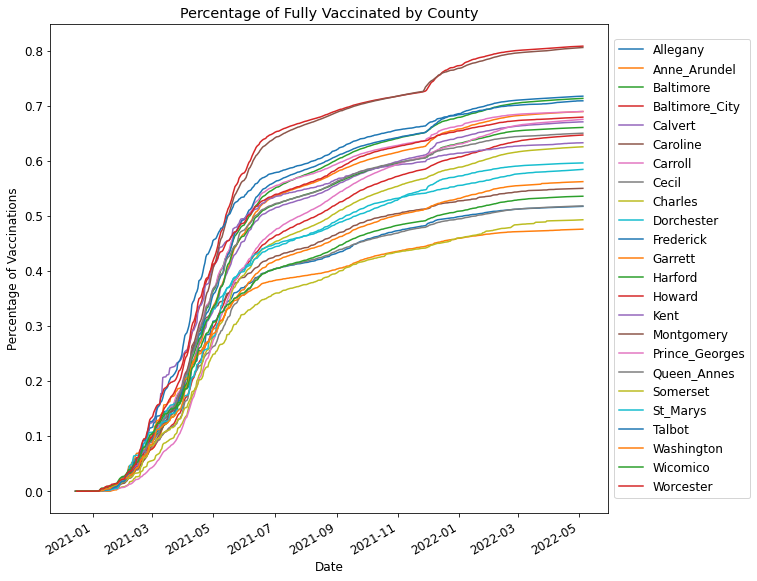

In [116]:
#Graph for Percentage of people who are Fully Vaccinated
fig, ax = plt.subplots()
plt.title("Percentage of Fully Vaccinated by County")
plt.ylabel("Percentage of Vaccinations")
plt.xlabel("Date")
dfVP.groupby("County").plot(x = "VD", y = "FVP", ax=ax, xlabel = "Date", figsize = (10, 10))
ax.legend(counties, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<h2> Conclusion: </h2>
From our data and analysis, we are able to see how different counties went about vaccinations and how those decisions affected the amount of COVID-19 cases and deaths. As we can see from our data that the Omicron variant was a huge outlier that spiked cases dramatically even through counties vaccination decisions. Hopefully, this tutorial shows our viewers how important it is to get vaccinated if we want to beat COVID. What we cover could certainly apply to other datasets since data science is all about tidying datasets, preparing them for further analysis, and finally plotting and explaining any relevant visualizations or models. 

There are so many more avenues that could be explored with COVID that we did not touch in this tutorial. We merely touched Maryland but this study could be analyzed globally or in other states. This tutorial was just a tiny sliver of the data pie that is COVID-19. We hoped you learned something from this data that we analyzed.